# Affine transforms
Here we compare performance of affine transforms implemented in [cupy](https://cupy.dev), [scipy](https://scipy.org) and clEsperanto

**Note:** benchmarking results vary heavily depending on image size, kernel size, used operations, parameters and used hardware. Use this notebook to adapt it to your use-case scenario and benchmark on your target hardware. If you have different scenarios or use-cases, you are very welcome to submit your notebook as pull-request!

In [1]:
import pyclesperanto_prototype as cle
import pyclesperanto as pcle
import time

# to measure kernel execution duration properly, we need to set this flag. It will slow down exection of workflows a bit though
cle.set_wait_for_kernel_finish(True)

# selet a GPU with the following in the name. This will fallback to any other GPU if none with this name is found
cle.select_device('RTX')

<NVIDIA GeForce RTX 4090 on Platform: NVIDIA CUDA (1 refs)>

In [2]:
device = pcle.select_device("RTX")
device

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.183.06
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24183 MB
	Maximum Object Size:         6045 MB
	Max Clock Frequency:         2520 MHz
	Image Support:               Yes

In [3]:
from skimage.io import imread, imshow
image = imread('data/Haase_MRT_tfl3d1.tif')

(120, 160, 160)

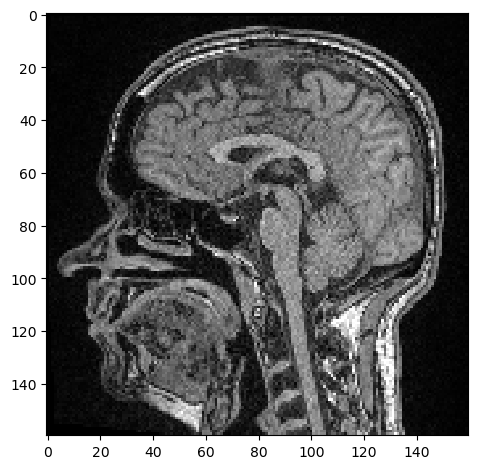

In [4]:
imshow(image[60])
image.shape

In [5]:
import numpy as np

# scaling by factor 1 / s
s = 0.5
matrix = np.asarray([
    [s, 0, 0, 0],
    [0, s, 0, 0],
    [0, 0, s, 0],
    [0, 0, 0, 1],
])
output_shape = tuple((np.asarray(image.shape) / s).astype(int))
print(output_shape)


(240, 320, 320)


## clEsperanto prototype

clEsperanto affine transform duration: 0.006661176681518555
clEsperanto affine transform duration: 0.0011239051818847656
clEsperanto affine transform duration: 0.0009667873382568359
clEsperanto affine transform duration: 0.0009636878967285156
clEsperanto affine transform duration: 0.0009686946868896484
clEsperanto affine transform duration: 0.0010738372802734375
clEsperanto affine transform duration: 0.0014636516571044922
clEsperanto affine transform duration: 0.0010154247283935547
clEsperanto affine transform duration: 0.0010297298431396484
clEsperanto affine transform duration: 0.0009496212005615234


/home/strigaud/Libraries/miniforge3/envs/skbuild2/lib/python3.12/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


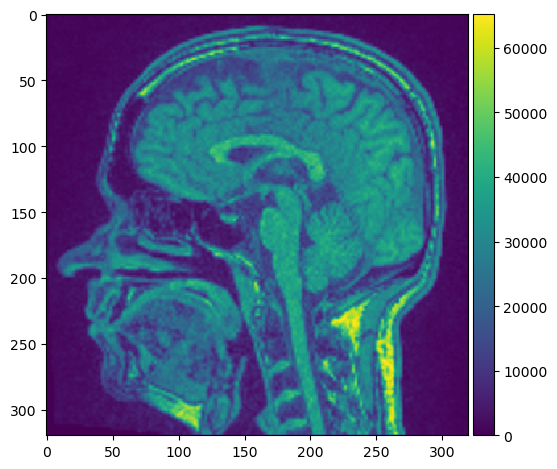

In [6]:
ocl_image = cle.push(image)

ocl_scaled = cle.create(output_shape)
for i in range(0, 10):
    start_time = time.time()
    cle.affine_transform(ocl_image, ocl_scaled, transform=np.linalg.inv(matrix), linear_interpolation=True)
    print("clEsperanto affine transform duration: " + str(time.time() - start_time))

result = cle.pull(ocl_scaled)
imshow(result[120])

In [7]:
pcle.affine_transform?

Signature:
pcle.affine_transform(
    input_image: Union[numpy.ndarray, pyclesperanto._pyclesperanto._Array],
    output_image: Union[numpy.ndarray, pyclesperanto._pyclesperanto._Array] = None,
    transform_matrix: Optional[list] = None,
    interpolate: bool = False,
    resize: bool = False,
    transform: Optional[numpy.ndarray] = None,
    linear_interpolation: Optional[bool] = None,
    auto_size: Optional[bool] = None,
) -> Union[numpy.ndarray, pyclesperanto._pyclesperanto._Array]
Docstring: <no docstring>
File:      ~/Libraries/miniforge3/envs/skbuild2/lib/python3.12/site-packages/pyclesperanto/_interroperability.py
Type:      function

/home/strigaud/Libraries/miniforge3/envs/skbuild2/lib/python3.12/site-packages/pyclesperanto/_interroperability.py:47: DeprecationWarning: affine_transform : 'transform_matrix' parameter is deprecated. Please use 'transform' instead.
  warnings.warn(
/home/strigaud/Libraries/miniforge3/envs/skbuild2/lib/python3.12/site-packages/pyclesperanto/_interroperability.py:54: DeprecationWarning: affine_transform : 'linear_interpolation' parameter is deprecated. Please use 'interpolate' instead.
  warnings.warn(
/home/strigaud/Libraries/miniforge3/envs/skbuild2/lib/python3.12/site-packages/pyclesperanto/_interroperability.py:47: DeprecationWarning: affine_transform : 'transform_matrix' parameter is deprecated. Please use 'transform' instead.
  warnings.warn(
/home/strigaud/Libraries/miniforge3/envs/skbuild2/lib/python3.12/site-packages/pyclesperanto/_interroperability.py:54: DeprecationWarning: affine_transform : 'linear_interpolation' parameter is deprecated. Please use 'interpolate' instead.
 

clEsperanto affine transform duration: 0.0499875545501709
clEsperanto affine transform duration: 0.0009293556213378906
clEsperanto affine transform duration: 0.0007138252258300781
clEsperanto affine transform duration: 0.0007185935974121094
clEsperanto affine transform duration: 0.0006821155548095703
clEsperanto affine transform duration: 0.0006690025329589844
clEsperanto affine transform duration: 0.0006682872772216797
clEsperanto affine transform duration: 0.0006620883941650391
clEsperanto affine transform duration: 0.0007841587066650391
clEsperanto affine transform duration: 0.0006875991821289062


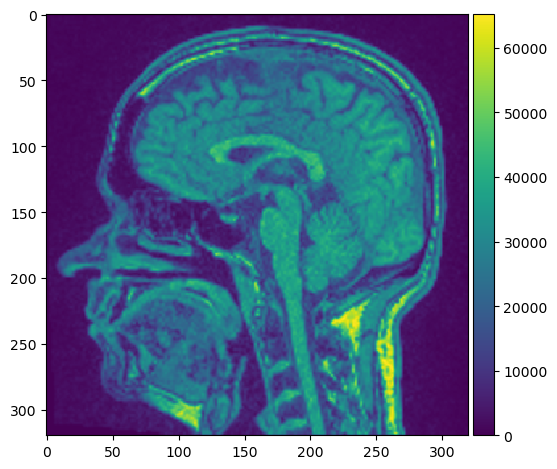

In [8]:
ocl_image = pcle.push(image)

ocl_scaled = pcle.create(output_shape)
for i in range(0, 10):
    start_time = time.time()
    pcle.affine_transform(ocl_image, ocl_scaled, transform=np.linalg.inv(matrix), linear_interpolation=True)
    print("clEsperanto affine transform duration: " + str(time.time() - start_time))

result = pcle.pull(ocl_scaled)
imshow(result[120])

Same process, but avoiding deprecated arguments

clEsperanto affine transform duration: 0.0010159015655517578
clEsperanto affine transform duration: 0.0007071495056152344
clEsperanto affine transform duration: 0.0006761550903320312
clEsperanto affine transform duration: 0.0006690025329589844
clEsperanto affine transform duration: 0.0006711483001708984
clEsperanto affine transform duration: 0.0006718635559082031
clEsperanto affine transform duration: 0.0007815361022949219
clEsperanto affine transform duration: 0.0007443428039550781
clEsperanto affine transform duration: 0.0006821155548095703
clEsperanto affine transform duration: 0.0006685256958007812


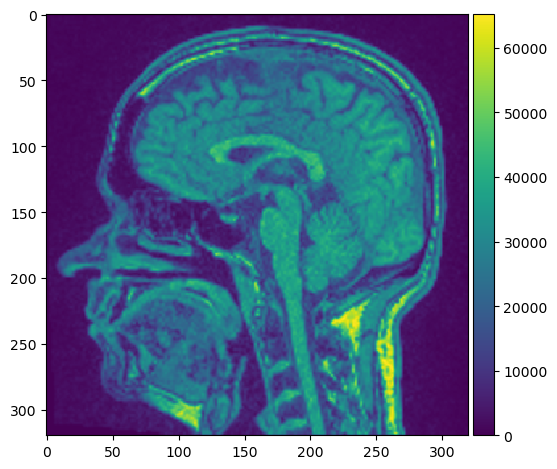

In [11]:
ocl_image = pcle.push(image)

ocl_scaled = pcle.create(output_shape)
for i in range(0, 10):
    start_time = time.time()
    pcle.affine_transform(ocl_image, ocl_scaled, transform_matrix=np.linalg.inv(matrix).flatten(), interpolate=True)
    print("clEsperanto affine transform duration: " + str(time.time() - start_time))

result = pcle.pull(ocl_scaled)
imshow(result[120])

## Scipy

scipy affine transform duration: 3.072181224822998
scipy affine transform duration: 3.053129196166992
scipy affine transform duration: 3.0509238243103027
scipy affine transform duration: 3.053027868270874
scipy affine transform duration: 3.050128221511841
scipy affine transform duration: 3.057412624359131
scipy affine transform duration: 3.0238237380981445
scipy affine transform duration: 3.0527193546295166
scipy affine transform duration: 3.050049304962158
scipy affine transform duration: 3.0505456924438477


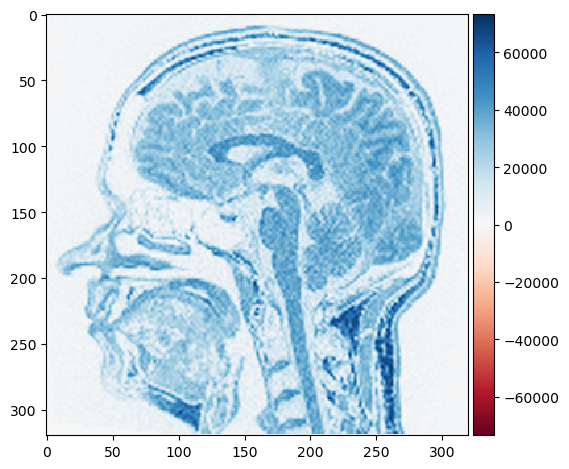

In [9]:
import time
from scipy import ndimage as sndi

scaled = np.ndarray(output_shape)
for i in range(0, 10):
    start_time = time.time()
    sndi.affine_transform(image, matrix, output=scaled, output_shape=output_shape)
    print("scipy affine transform duration: " + str(time.time() - start_time))

imshow(scaled[120])